# Not quite done with this

In [1]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [8]:
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Impute 0s and grab numerical variables

In [9]:
df.drop(['Id'], axis=1,inplace=True)
df = df.fillna(0)

In [12]:
df_numeric=df.select_dtypes(exclude=['object'])
df_categorical=df.select_dtypes(include=['object'])

In [14]:
print(df_numeric.shape)
print(df_categorical.shape)

(1460, 37)
(1460, 43)


# Split into train test

In [15]:
y=df_numeric['SalePrice']
X=df_numeric.drop('SalePrice', 1) 

In [16]:
#Split the data 70-30 train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [17]:
X_train.shape, X_test.shape

((1022, 36), (438, 36))

## Linear Regression

In [18]:
## LinearRegression model with only numeric predictors
## SalePrice as the target

lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# can look at the coefficients
list(zip(X_train.columns,lr_model1.coef_));

In [24]:
# Getting predictions of the model on the test set

test_set_pred1 = lr_model1.predict(X_test)

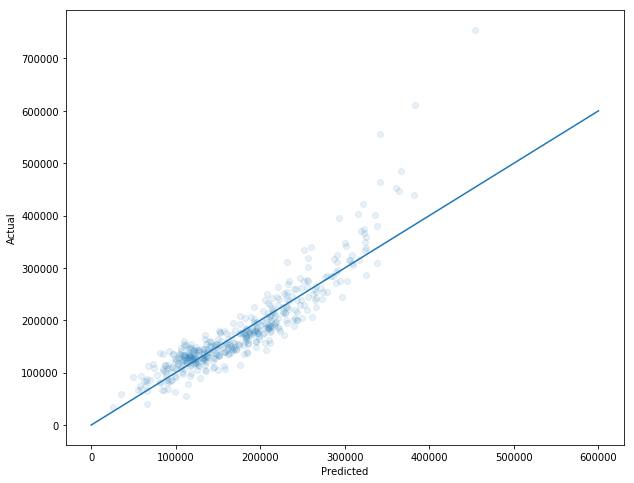

In [25]:
## Plotting the actual vs expected house price (along with the line x=y for reference)
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [26]:
lr_model1.score(X,y)

0.8117765276404401

## Lasso

In [27]:
lasso = linear_model.Lasso(alpha=1)

alphas_lasso = np.logspace(-2, 4, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha=i).fit(X_train,y_train)
    coef_lasso.append(lasso.coef_)



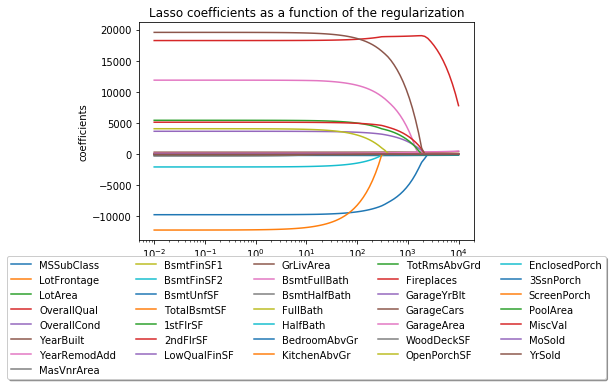

In [28]:
plt.figure(figsize=(12,6))
columns = X_train.columns
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [29]:
## coefficients
lasso = linear_model.Lasso(alpha=10e3) # create a lasso instance
lasso.fit(X_train,y_train) # fit data
lasso.intercept_ # print out the coefficients

-1805732.3715066733